In [2]:
#classification binaire sur un dataset artificiel
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1) Générer un dataset simple
X, y = make_classification(n_samples=500,
                           n_features=2,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=42)

# 2) Diviser train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3) Créer un perceptron (single-layer)
model = Perceptron(max_iter=1000, eta0=0.1)

# 4) Entraînement
model.fit(X_train, y_train)

# 5) Prédiction
y_pred = model.predict(X_test)

print("Accuracy :", accuracy_score(y_test, y_pred))


Accuracy : 0.84


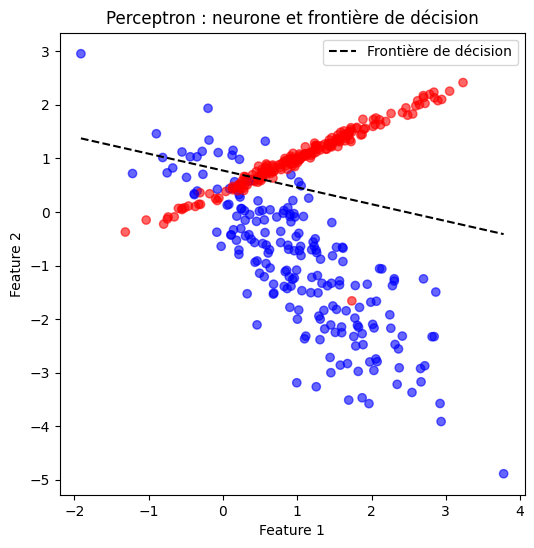

In [3]:
#visulisation 
import numpy as np
import matplotlib.pyplot as plt

# Affichage des données
plt.figure(figsize=(6, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', alpha=0.6)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Récupérer poids et biais
w = model.coef_[0]
b = model.intercept_[0]

# Droite de décision : w1*x + w2*y + b = 0
x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_vals = -(w[0] * x_vals + b) / w[1]

plt.plot(x_vals, y_vals, 'k--', label="Frontière de décision")
plt.legend()
plt.title("Perceptron : neurone et frontière de décision")
plt.show()


1) Perceptron (1 neurone – frontière linéaire)

Ce que tu vois :

Une droite (frontière de décision)

Beaucoup de points mal classés près du chevauchement

Pourquoi :

Un perceptron = un seul neurone

Il apprend uniquement :

𝑤1x1 + 𝑤2x2 +b=0

Conclusion :

❌ Trop simple
❌ Ne gère pas la non-linéarité
✅ Bon pour comprendre les bases

Accuracy: 0.98


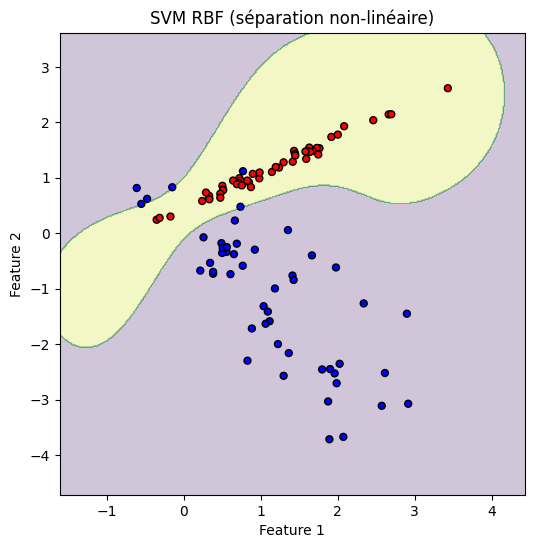

In [4]:
#SVM avec noyau RBF (séparation courbe)
#SVM = Support Vector Machine
#RBF = Radial Basis Function (noyau gaussien)
#Un SVM RBF est un classifieur qui sépare les données avec une frontière NON linéaire, très efficace quand les classes ont des formes complexes.

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 1) Dataset
X, y = make_classification(
    n_samples=500, n_features=2, n_redundant=0,
    n_clusters_per_class=1, class_sep=1.2, random_state=42
)

# 2) Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3) Modèle: scaling + SVM RBF
model = make_pipeline(
    StandardScaler(),
    SVC(kernel="rbf", C=10, gamma="scale")
)

# 4) Train / Predict
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

# 5) Affichage frontière de décision
def plot_decision_boundary(model, X, y, title="Frontière de décision"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 400),
        np.linspace(y_min, y_max, 400)
    )
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.figure(figsize=(6, 6))
    plt.contourf(xx, yy, Z, alpha=0.25)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolor="k", s=25)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(model, X_test, y_test, "SVM RBF (séparation non-linéaire)")


SVM RBF (meilleure séparation)

Ce que tu vois :

Une frontière lisse et adaptée à la forme réelle des données

Très peu d’erreurs visibles

Pourquoi :

Noyau RBF → projection dans un espace de dimension élevée

Maximisation de la marge

Très robuste en 2D

Conclusion :

✅ Meilleure séparation

✅ Très stable

❌ Moins interprétable

Accuracy: 0.99


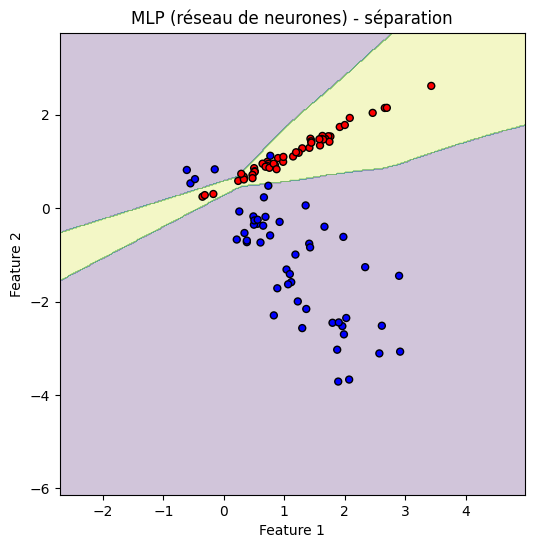

In [5]:
#MLP (réseau de neurones) pour une séparation non-linéaire
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

X, y = make_classification(
    n_samples=500, n_features=2, n_redundant=0,
    n_clusters_per_class=1, class_sep=1.2, random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = make_pipeline(
    StandardScaler(),
    MLPClassifier(hidden_layer_sizes=(20, 20), activation="relu",
                  max_iter=3000, random_state=42)
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Frontière
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 400),
                     np.linspace(y_min, y_max, 400))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(6,6))
plt.contourf(xx, yy, Z, alpha=0.25)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap="bwr", edgecolor="k", s=25)
plt.title("MLP (réseau de neurones) - séparation")
plt.xlabel("Feature 1"); plt.ylabel("Feature 2")
plt.show()


MLP (réseau de neurones)

Ce que tu vois :

Une frontière plus flexible

La zone jaune suit mieux la structure des points rouges

Pourquoi :

Plusieurs neurones + couches cachées

Combinaison de plusieurs frontières linéaires

Activation non linéaire (ReLU)

Conclusion :

✅ Bien meilleur que le perceptron

⚠️ Peut encore se tromper si la frontière est complexe

⚠️ Sensible aux hyperparamètres